Epoch [100/1000], Loss: 0.4115
Epoch [200/1000], Loss: 0.2245
Epoch [300/1000], Loss: 0.2210
Epoch [400/1000], Loss: 0.2209
Epoch [500/1000], Loss: 0.2209
Epoch [600/1000], Loss: 0.2209
Epoch [700/1000], Loss: 0.2209
Epoch [800/1000], Loss: 0.2209
Epoch [900/1000], Loss: 0.2209
Epoch [1000/1000], Loss: 0.2209
Модель збережена як 'linear_regression_model.pth'


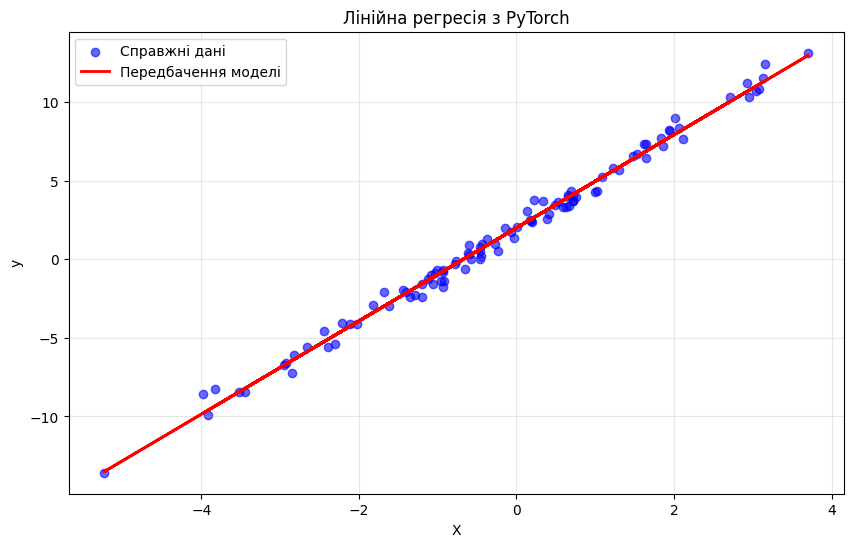


Завантаження збереженої моделі:
Вага (slope): 2.9642
Зміщення (bias): 2.0037


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Генерація синтетичних даних
np.random.seed(42)
X = np.random.randn(100, 1) * 2
y = 3 * X + 2 + np.random.randn(100, 1) * 0.5

# Конвертація в PyTorch тензори
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

# Визначення моделі лінійної регресії
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Ініціалізація моделі
model = LinearRegressionModel()

# Визначення функції втрат та оптимізатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Тренування моделі
epochs = 1000
for epoch in range(epochs):
    # Прямий прохід
    y_pred = model(X_tensor)

    # Обчислення втрат
    loss = criterion(y_pred, y_tensor)

    # Зворотний прохід
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Виведення втрат кожні 100 епох
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Збереження моделі
torch.save(model.state_dict(), 'linear_regression_model.pth')
print("Модель збережена як 'linear_regression_model.pth'")

# Перевірка збереженої моделі
model.eval()
with torch.no_grad():
    predicted = model(X_tensor)

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Справжні дані')
plt.plot(X, predicted.numpy(), color='red', linewidth=2, label='Передбачення моделі')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія з PyTorch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Демонстрація завантаження збереженої моделі
print("\nЗавантаження збереженої моделі:")
new_model = LinearRegressionModel()
new_model.load_state_dict(torch.load('linear_regression_model.pth'))
new_model.eval()

# Перевірка параметрів моделі
print(f"Вага (slope): {new_model.linear.weight.item():.4f}")
print(f"Зміщення (bias): {new_model.linear.bias.item():.4f}")
import

In [3]:
import wandb

# Ініціалізація W&B проекту
wandb.init(project="linear-regression-pytorch", name="linear_regression_model")

# Метод 1: Збереження як артефакт (рекомендований)
artifact = wandb.Artifact('linear_regression_model', type='model')
artifact.add_file('linear_regression_model.pth')
wandb.log_artifact(artifact)

# Метод 2: Простий upload файлу
wandb.save('linear_regression_model.pth')

# Додаткова інформація про модель
model = LinearRegressionModel()
model.load_state_dict(torch.load('linear_regression_model.pth'))
model.eval()

# Логування метаданих моделі
wandb.config.update({
    "model_type": "Linear Regression",
    "input_features": 1,
    "output_features": 1,
    "framework": "PyTorch",
    "weight": model.linear.weight.item(),
    "bias": model.linear.bias.item()
})

print("Модель успішно завантажена до W&B!")
wandb.finish()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: berejant (berejant-set-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Модель успішно завантажена до W&B!
